In [17]:
import json
import requests
from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics


sns.set_palette('Set2')
%matplotlib inline

In [18]:
df=pd.read_csv('../data/input_data/bitfinix.csv')
df.time = pd.to_datetime(df.time, unit='ms')
df = df.set_index('time')

In [19]:
split_row = len(df) - int(0.2 * len(df))
train_data = df.iloc[:split_row]
test_data = df.iloc[split_row:]

In [4]:
split_row

1931695

In [20]:
ind=df[1931696:2414618].index.tolist()

In [21]:
x_train = train_data[['high','low','open','volume']]
y_train = train_data[['close']]
x_test = test_data[['high','low','open','volume']]
y_test = test_data[['close']]

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
y_train = scaler1.fit_transform(y_train)
x_test = scaler.transform(x_test)
y_test = scaler1.transform(y_test)

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap=True, criterion='mse',
             n_estimators=100,random_state=10)
rf.fit(x_train, np.ravel(y_train));


In [23]:
preds = rf.predict(x_test)

In [24]:
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("Root Mean Squared Error(RMSE) : ", sqrt(mean_squared_error(y_test,preds)))
print("Mean Absolute Error(MAE) : ", mean_absolute_error(y_test,preds))
r2 =  r2_score(y_test, preds)
print("R Squared (R2) : ",r2)


Root Mean Squared Error(RMSE) :  3.726756733504451
Mean Absolute Error(MAE) :  1.6205868977750364
R Squared (R2) :  0.999998073405666


In [25]:
n = len(x_train)
p = len(x_train[0])
num = (1-r2)*(n-1)
denom = (n-p-1)
r2_adj = 1-(num/denom)
print("Adjusted R2 : ",r2_adj)

KeyError: 0

In [41]:
y_inv=scaler1.inverse_transform(y_test).tolist()

In [42]:
y_list = [item for sublist in y_inv for item in sublist]
pred_lst=scaler1.inverse_transform([preds])[0].tolist()


/home/divya_kaushik1010/.local/lib/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


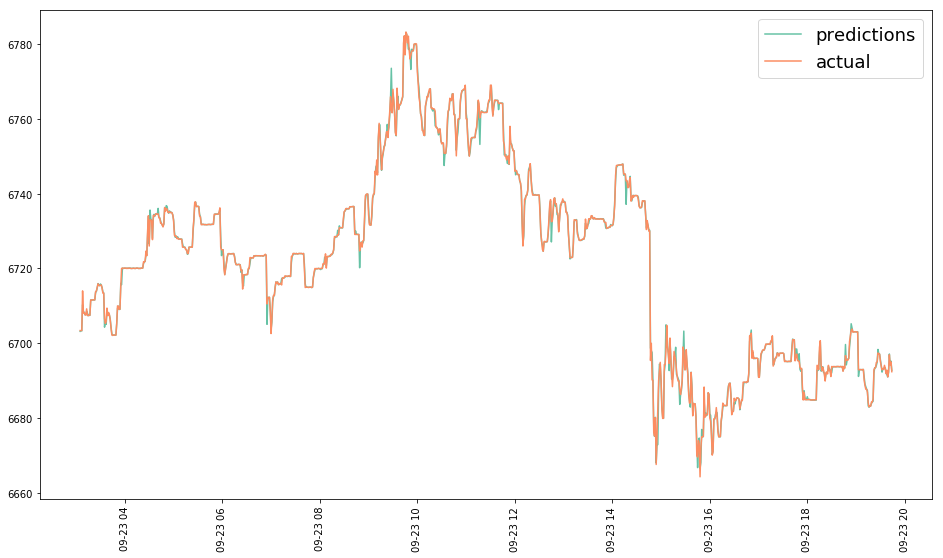

In [26]:
fig, ax = plt.subplots(1, figsize=(16, 9))
ax.plot(ind[0:1000],preds[0:1000],label='predictions')
ax.plot(ind[0:1000],y_test[0:1000],label='actual')
ax.legend(loc='best', fontsize=18)
plt.xticks(rotation=90)
plt.show()